# Prerequisite Test ES 335 Machine Learning


## Vansh Jenikumar Barfiwala 24110380

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time 
import random
import jax.numpy as jnp
from jax import grad
import pandas as pd
import sympy as sp


##### Question 1: How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain

ANSWER:

Let matrix A is of size (n,k) and matrix B is of size (k,m) and C be the final matrix obtained after performing matrix multiplication on A and B.
The size of C is (n,m).

Each element in the obtained by taking one row from matrix A and one column from matrix B and then multiplying corresponding elements and adding their product. For this, total 'k' multiplications are performed and 'k-1' additions since the row or column has k elements.

Since there are total n*m elements in C. 
Total multiplications performed = nmk
Total additions performed = nm(k-1)

##### Question 2: Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [2]:
#USING LIST OF LISTS
m1 = [[i + j for j in range(100)] for i in range(200)]
m2 = [[i * j for j in range(300)] for i in range(100)]

m3 = [[0 for j in range(300)] for i in range(200)]

stime = time.time()
for i in range(200):
    for j in range(300):
        for k in range(100):
            m3[i][j] += m1[i][k] * m2[k][j]
etime = time.time()

print("Time taken using list of lists",etime-stime,"seconds")

#USING NUMPY
m1 = np.array(m1)
m2 = np.array(m2)

stime = time.time()
m3 = np.dot(m1,m2)
etime = time.time()

print("Time taken using numpy",etime-stime,"seconds")


Time taken using list of lists 0.6988942623138428 seconds
Time taken using numpy 0.0023331642150878906 seconds


ANSWER:

 Doing matrix multiplication is faster using Numpy than using list of lists because in numpy calculations are performed on entire array rather than on each element at a time which makes it much faster.

##### Question 3: Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

In [3]:
a = [random.randint(0, 100) for _ in range(10000)]

#BRUTE FORCE

st = time.time()
c1 = a.copy()

start = time.time()
dum = len(c1) // 2
for i in range(dum):
        c1.remove(max(c1))
print(max(c1))
et = time.time()
print("Time taken for brute force method",et-st)

#USING SORT

c2 = a.copy()
st = time.time()
m = len(c2)//2
c2.sort()
if len(c2)%2 == 0:
    print((c2[m -1] + c2[m])/2)
else:
    print(c2[m])
et = time.time()
print("Time taken using sorting",et-st)

#USING numpy.median

st= time.time()
print(np.median(np.array(a)))
et = time.time()
print("Time taken using numpy median",et-st)

50
Time taken for brute force method 0.30983829498291016
50.0
Time taken using sorting 0.0007607936859130859
50.0
Time taken using numpy median 0.006429910659790039


ANSWER:

The time taken to find the median of the array was largest using brute force followed by using sort and was fastest using numpy median.
But in some cases ( usually with small arrays ), the fastest approach was using sort.

In the brute force approach, the maximum element is stored in each iteration with Time complexity $O(n)$ and then removed whose time complexity is again $O(n)$. Hence the overall TC for brute force approach is $O(n^2)$.

Another method was to sort the entire array and calculate the median. The overall TC was $O(n log(n))$ due to sorting.

The time complexity using numpy median is $O(n)$.

##### Question 4: What is the gradient of the following function with respect to x and y?

$$
f(x,y) = x^{2}y + y^{3}\sin x
$$



ANSWER:

The gradient of a function is calculated by doing partial derivations with respect to each variable.
Here we calculated the gradient in x by differentiating with respect to x and then repeating for y.

$$
\frac{\partial f}{\partial x}
= \frac{\partial}{\partial x}(x^{2}y)
  + \frac{\partial}{\partial x}(y^{3}\sin x)
= 2xy + y^{3}\cos x
$$

$$
\frac{\partial f}{\partial y}
= \frac{\partial}{\partial y}(x^{2}y)
  + \frac{\partial}{\partial y}(y^{3}\sin x)
= x^{2} + 3y^{2}\sin x
$$

$$

##### Question 5: Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [4]:
def fx(x,y):
    return (x**2)*y + (y**3)*jnp.sin(x)

def grad_analytic(x, y):
    dx = 2*x*y + y**3 * jnp.cos(x)
    dy = x**2 + 3*y**2 * jnp.sin(x)
    return dx, dy

def wrap(c):
    x, y = c
    return fx(x, y)

x1 = np.random.uniform(0,11)
y1= np.random.uniform(0,11)
analy_g = grad_analytic(x1,y1)
jax_grad = grad(wrap)
print("x:",x1,"y:",y1)
print("Analytical soltion: \n",analy_g)
print("Gradient calculated using JAX: \n",tuple(jax_grad(jnp.array([x1,y1]))),'\n')

x2 = float(np.random.randint(0,11))
y2= float(np.random.randint(0,11))
analy_g = grad_analytic(x2,y2)
jax_grad = grad(wrap)
print("x:",x2,"y:",y2)
print("Analytical soltion:\n",analy_g)
print("Gradient calculated using JAX\n",tuple(jax_grad(jnp.array([x2,y2]))))



x: 3.177120858422594 y: 4.757969343378129
Analytical soltion: 
 (Array(-77.41095, dtype=float32, weak_type=True), Array(7.681709, dtype=float32, weak_type=True))
Gradient calculated using JAX: 
 (Array(-77.41095, dtype=float32), Array(7.681709, dtype=float32)) 

x: 7.0 y: 6.0
Analytical soltion:
 (Array(246.84288, dtype=float32, weak_type=True), Array(119.95455, dtype=float32, weak_type=True))
Gradient calculated using JAX
 (Array(246.84288, dtype=float32), Array(119.95455, dtype=float32))


##### Question 6: Use sympy to confirm that you obtain the same gradient analytically.

In [5]:
x, y = sp.symbols('x y')
fx = x**2 * y + y**3 * sp.sin(x)
dx = sp.diff(fx, x)
dy = sp.diff(fx, y)

print("x:", x1, "y:", y1)
print("Gradient calculated using sympy:")
print(dx.subs({x: x1, y: y1}), dy.subs({x: x1, y: y1}),'\n')

print("x:", x2, "y:", y2)
print("Gradient calculated using sympy:")
print(dx.subs({x: x2, y: y2}), dy.subs({x: x2, y: y2}))


x: 3.177120858422594 y: 4.757969343378129
Gradient calculated using sympy:
-77.4109452754546 7.68171300730779 

x: 7.0 y: 6.0
Gradient calculated using sympy:
246.842886938154 119.954552661629


##### Question 7: Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

2022

Branch 1

Roll Number: 1, Name: N, Marks:

Maths: 100, English: 70 …

Branch 2

2023

Branch 1

Branch 2

2024

Branch 1

Branch 2

2025

Branch 1

Branch 2


In [6]:
studentdata = {
    2022: {
        "Branch 1": {
            1: {"Name": "Aditya", "Marks": {"Maths": 78, "English": 82}},
            2: {"Name": "Rohit", "Marks": {"Maths": 85, "English": 74}},
        },
        "Branch 2": {
            3: {"Name": "Manish", "Marks": {"Maths": 92, "English": 88}},
            4: {"Name": "Sanya", "Marks": {"Maths": 81, "English": 79}},
        }
    },
    2023: {
        "Branch 1": {
            1: {"Name": "Priya", "Marks": {"Maths": 80, "English": 79}},
            2: {"Name": "Kabir", "Marks": {"Maths": 77, "English": 85}},
        },
        "Branch 2": {
            3: {"Name": "Kunal", "Marks": {"Maths": 87, "English": 90}},
            4: {"Name": "Aditi", "Marks": {"Maths": 90, "English": 84}},
        }
    },
    2024: {
        "Branch 1": {
            1: {"Name": "Ishita", "Marks": {"Maths": 91, "English": 83}},
            2: {"Name": "Dev", "Marks": {"Maths": 86, "English": 77}},
        },
        "Branch 2": {
            3: {"Name": "Rahul", "Marks": {"Maths": 76, "English": 85}},
            4: {"Name": "Meera", "Marks": {"Maths": 89, "English": 91}},
        }
    },
    2025: {
        "Branch 1": {
            1: {"Name": "Simran", "Marks": {"Maths": 88, "English": 92}},
            2: {"Name": "Arjun", "Marks": {"Maths": 84, "English": 80}},
        },
        "Branch 2": {
            3: {"Name": "Aarav", "Marks": {"Maths": 94, "English": 81}},
            4: {"Name": "Riya", "Marks": {"Maths": 79, "English": 87}},
        }
    }
}


##### Question 8: Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [7]:
class Student:
    def __init__(self, rollno, name, marks):
        self.rollno = rollno
        self.name = name
        self.marks = marks

class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

    def add_student(self, student):
        self.students.append(student)

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)

database = []


year2022 = Year(2022)

branch1 = Branch("Branch 1")
branch1.add_student(Student(1, "Aditya", {"Maths": 78, "English": 82}))
branch1.add_student(Student(2, "Rohit", {"Maths": 85, "English": 74}))
branch2 = Branch("Branch 2")
branch2.add_student(Student(3, "Manish", {"Maths": 92, "English": 88}))
branch2.add_student(Student(4, "Sanya", {"Maths": 81, "English": 79}))
year2022.add_branch(branch1)
year2022.add_branch(branch2)
database.append(year2022)

year2023 = Year(2023)
branch1 = Branch("Branch 1")
branch1.add_student(Student(5, "Karan", {"Maths": 76, "English": 84}))
branch1.add_student(Student(6, "Priya", {"Maths": 89, "English": 91}))
branch2 = Branch("Branch 2")
branch2.add_student(Student(7, "Amit", {"Maths": 83, "English": 77}))
branch2.add_student(Student(8, "Neha", {"Maths": 95, "English": 90}))
year2023.add_branch(branch1)
year2023.add_branch(branch2)
database.append(year2023)

for year in database:
    print("\nYear:", year.year,'\n')
    for branch in year.branches:
        print(branch.name)
        for student in branch.students:
            print("Roll No.:", student.rollno, "Name:", student.name, "Marks:", student.marks)




Year: 2022 

Branch 1
Roll No.: 1 Name: Aditya Marks: {'Maths': 78, 'English': 82}
Roll No.: 2 Name: Rohit Marks: {'Maths': 85, 'English': 74}
Branch 2
Roll No.: 3 Name: Manish Marks: {'Maths': 92, 'English': 88}
Roll No.: 4 Name: Sanya Marks: {'Maths': 81, 'English': 79}

Year: 2023 

Branch 1
Roll No.: 5 Name: Karan Marks: {'Maths': 76, 'English': 84}
Roll No.: 6 Name: Priya Marks: {'Maths': 89, 'English': 91}
Branch 2
Roll No.: 7 Name: Amit Marks: {'Maths': 83, 'English': 77}
Roll No.: 8 Name: Neha Marks: {'Maths': 95, 'English': 90}


##### Question 9: Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.


$$ y = x $$

$$ y = x^{2} $$

$$ y = \frac{x^{3}}{100} $$

$$ y = \sin(x) $$

$$ y = \frac{\sin(x)}{x} $$

$$ y = \log(x) $$

$$ y = e^{x} $$


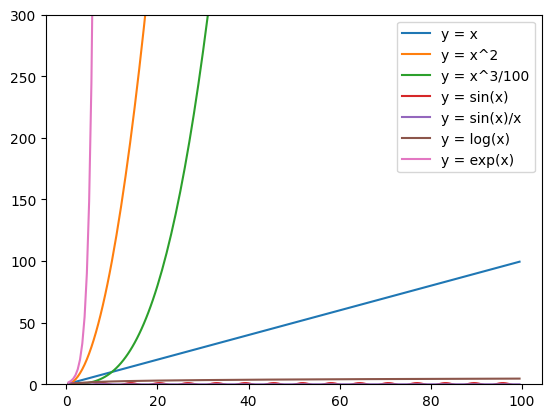

In [8]:
x = np.arange(0.5,100,0.5)
y1 = x
y2 = x**2
y3 = (x**3)/100
y4 = np.sin(x)
y5 = (np.sin(x)/x)
y6 = np.log(x)
y7 = np.exp(x)

plt.plot(x, y1, label="y = x")
plt.plot(x, y2, label="y = x^2")
plt.plot(x, y3, label="y = x^3/100")
plt.plot(x, y4, label="y = sin(x)")
plt.plot(x, y5, label="y = sin(x)/x")
plt.plot(x, y6, label="y = log(x)")
plt.plot(x, y7, label="y = exp(x)")
plt.ylim(0, 300)
plt.legend()
plt.show()

##### Question 10: Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [9]:
a = np.random.uniform(1,2,size = (20,5))
df = pd.DataFrame(a,columns = ["a", "b", "c", "d", "e"])

print(df.std().idxmax())
print(df.mean(axis = 1).idxmin())

a
16


##### Question 11:Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively

In [10]:
df['f'] = df[['a','b','c','d','e']].sum(axis=1)
df["g"] = df["f"].apply(lambda x: "LT8" if x<8 else "GT8")

print((df["g"] == "LT8").sum())
print(df[df["g"]=="LT8"]["f"].std())
print(df[df["g"]=="GT8"]["f"].std())

15
0.5433777532193573
0.19527422208272166


##### Question 12: Write a small piece of code to explain broadcasting in numpy.

ANSWER: 

Broadcasting basically means when performing mathematical operations on matrixes of mistmatch size, numpy expands the smaller matrix so that it matches the size of bigger matrix.

In the example given below, matrix A is of size(3,2) while B is of size(2,) so numpy expands B to size(3,2) by repeating the rows so that mathematical operations can be performed on the two.

In [11]:
a = np.array([[13,3],[28,12],[2,32]])
b = np.array([2,32])
c = a+b
print("A\n",a,'\n')
print("B\n",b,'\n')
print("C = A + B\n",c)

A
 [[13  3]
 [28 12]
 [ 2 32]] 

B
 [ 2 32] 

C = A + B
 [[15 35]
 [30 44]
 [ 4 64]]


##### Question 13: Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [12]:
def am(a):
    ans = 0
    dum = a[0]
    for i in range(1, len(a)):
        if a[i] < dum:
            dum = a[i]
            ans = i
    return ans

a = np.array([4,3,-1,0,9,0,5])
print(am(a))
print(a.argmin())

2
2
